# On parameterized scientific computing

In [1]:
using OrdinaryDiffEq, Plots, Flux, GalacticOptim

pyplot()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1342


LoadError: ArgumentError: Package GalacticOptim not found in current path:
- Run `import Pkg; Pkg.add("GalacticOptim")` to install the GalacticOptim package.


In [3]:
using DiffEqFlux

┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1342


In [15]:
function sci_train(loss::Function, θ, opt = ADAM(), adtype = GalacticOptim.AutoZygote(), args...; maxiters = 200::Integer, kwargs...)
    f = GalacticOptim.OptimizationFunction((x, p) -> loss(x), adtype)
    fi = GalacticOptim.instantiate_function(f, θ, adtype, nothing)
    prob = GalacticOptim.OptimizationProblem(fi, θ; kwargs...)
    return GalacticOptim.solve(prob, opt, args...; maxiters = maxiters, kwargs...)
end

sci_train (generic function with 3 methods)

In [4]:
function lotka_volterra(u, p, t)
    α, β, δ, γ = p
    🐰, 🦊 = u
    rhs = [🐰 * (α - β * 🦊), -🦊 * (γ - δ * 🐰)]
end

lotka_volterra (generic function with 1 method)

In [5]:
u0 = [1.0, 1.0]

2-element Vector{Float64}:
 1.0
 1.0

In [6]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [8]:
p = [1.5, 1.0, 1.0, 3.0]

4-element Vector{Float64}:
 1.5
 1.0
 1.0
 3.0

In [9]:
prob = ODEProblem(lotka_volterra, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [10]:
sol = solve(prob, Midpoint())

retcode: Success
Interpolation: 3rd order Hermite
t: 725-element Vector{Float64}:
  0.0
  0.0016779262355463627
  0.0032066492149561004
  0.006457888530827752
  0.01038666439165586
  0.01601088972930634
  0.022768248065866248
  0.031011969967351696
  0.04043143263576264
  0.05105068559607068
  0.06266588056650954
  0.0751892880301063
  0.08847254561391854
  ⋮
  9.81970808006719
  9.836090308960975
  9.852509554598075
  9.868962999920885
  9.88544834206435
  9.901963764502334
  9.918507902828638
  9.935079809796452
  9.951678917566646
  9.968305003881978
  9.984958158987576
 10.0
u: 725-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0008421316648053, 0.9966504810799005]
 [1.0016148889893124, 0.9936097993677296]
 [1.0032758210922739, 0.9871777167800099]
 [1.0053144988054084, 0.9794679011906717]
 [1.0082930652664543, 0.9685493781194046]
 [1.0119650388734798, 0.9556134736499073]
 [1.0165821698379447, 0.940098185905158]
 [1.0220420492909177, 0.9227221697012322]
 [1.0284321341946914, 0.903

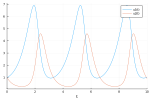

In [11]:
plot(sol)

In [12]:
tsteps = 0.0:0.2:10.0
function loss(p)
    sol = solve(prob, Midpoint(), p=p, saveat = tsteps)
    loss = sum(abs2, sol .- 1)
    return loss, sol
end

loss (generic function with 1 method)

In [13]:
callback = function (p, l, pred)
    display(l)
    plt = plot(pred, ylim = (0, 6))
    display(plt)
    return false
end

#1 (generic function with 1 method)

508.977407435795

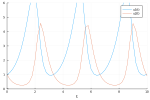

486.1861687197184

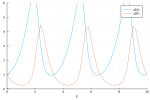

464.499596949708

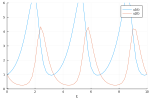

443.87890699773897

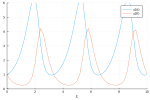

424.28438563047916

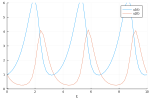

405.67541747468437

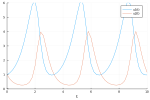

388.01018833294876

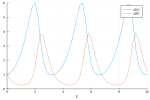

371.2448869098152

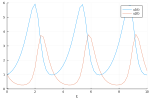

355.33523206825606

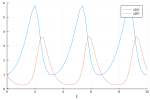

340.23712571425284

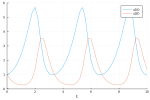

325.9079301214268

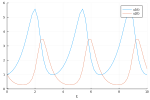

312.30676338965526

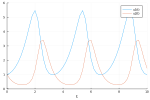

299.39444320799254

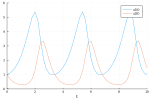

287.1338016089208

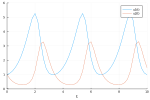

275.49009167587326

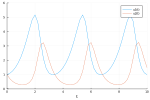

264.43034784732464

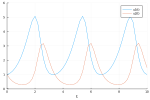

253.923662179529

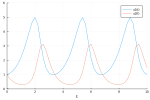

243.94091632007928

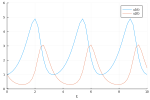

234.45465502095433

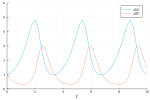

225.439006102001

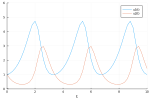

216.8694301493816

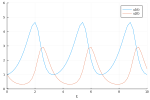

208.72283202928452

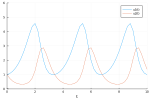

200.97707815843557

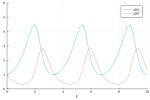

193.61130904971495

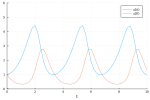

186.60557955923494

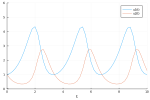

179.9408780382643

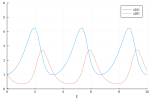

173.5990226443127

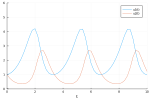

167.56259284008834

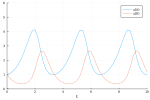

161.81519195162585

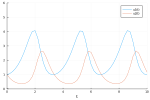

156.340868485294

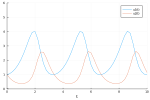

151.1245873351944

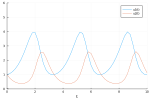

146.15193629326635

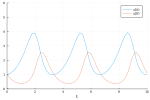

141.40935276485638

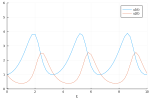

136.88368715905727

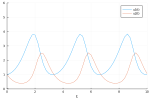

132.562806152261

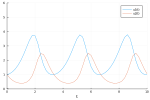

128.43518911877362

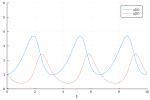

124.48983234205133

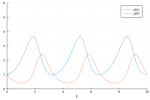

120.71656649917242

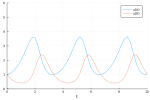

117.10573268682506

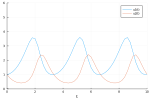

113.64838237867886

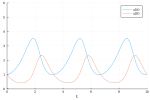

110.33617576652689

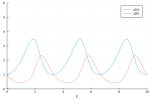

107.16109089887038

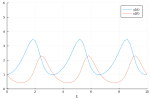

104.1157743479546

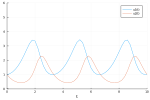

101.1933979570058

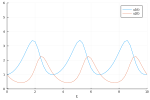

98.38741685799674

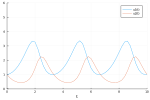

95.6917714655393

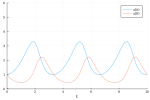

93.1008220677207

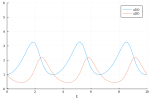

90.60917138762014

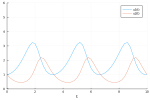

88.21182574120004

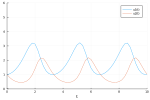

85.90397399258566

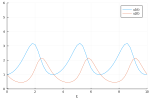

83.68115372728676

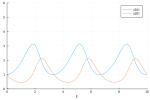

81.53912783960408

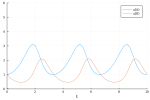

79.47399328339017

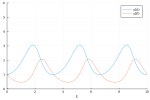

77.48191381559683

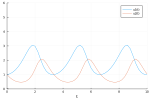

75.5594129551453

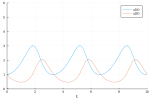

73.70308125982058

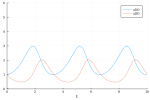

71.90983698406819

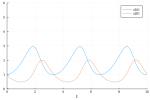

70.17662135821443

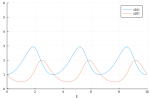

68.50071206447842

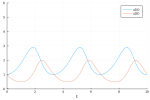

66.87946033084762

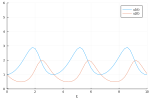

65.31027840344004

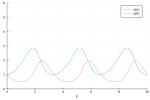

63.79100647416846

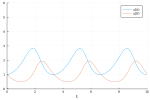

62.31927385113491

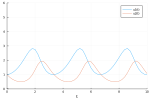

60.89307648266297

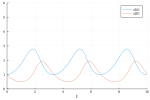

59.510419145314486

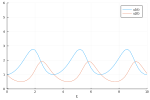

58.16948879648931

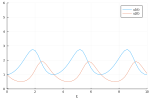

56.86850041314305

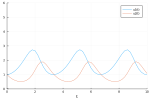

55.605821412729185

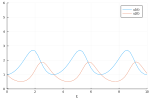

54.37989360882969

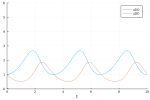

53.18919468686089

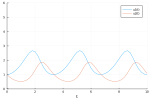

52.032350580403566

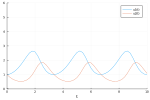

50.90806838995382

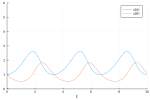

49.815013189826274

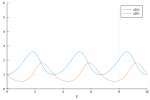

48.75208506540944

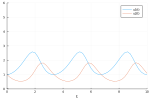

47.71805280221744

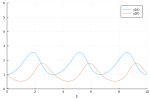

46.71188829882851

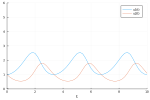

45.73251679112005

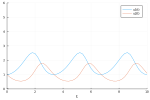

44.77901858370458

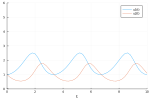

43.85038400352843

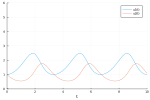

42.94575456711616

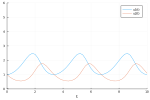

42.064302580380605

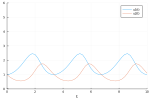

41.20521513715533

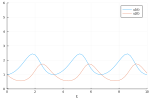

40.36767851690477

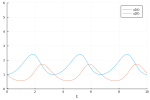

39.551011978919725

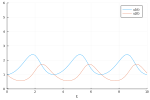

38.754468672201455

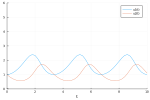

37.97740915621281

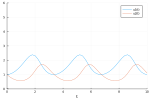

37.219160662234735

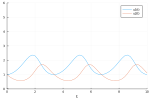

36.479102085271016

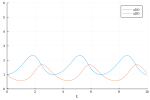

35.75673281058994

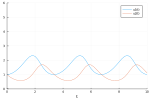

35.05141015234844

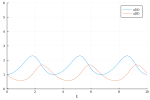

34.36262518484072

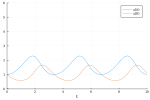

33.689808076026296

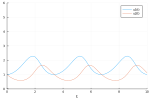

33.0325452404313

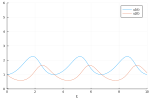

32.390322202537945

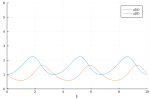

31.76270703147274

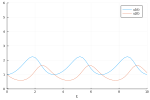

31.149248634208035

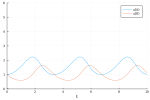

30.549550055104692

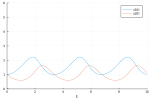

29.96315407577103

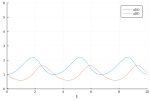

29.38975868108571

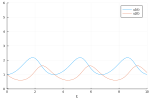

28.82892077900858

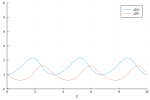

28.82892077900858

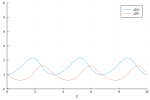

LoadError: MethodError: no method matching Optim.Options(; extended_trace=true, callback=GalacticOptim.var"#_cb#112"{var"#1#2", BFGS{LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Nothing, Float64, Flat}, Base.Iterators.Cycle{Tuple{GalacticOptim.NullData}}}(var"#1#2"(), BFGS{LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Nothing, Float64, Flat}(LineSearches.InitialStatic{Float64}
  alpha: Float64 1.0
  scaled: Bool false
, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}
  delta: Float64 0.1
  sigma: Float64 0.9
  alphamax: Float64 Inf
  rho: Float64 5.0
  epsilon: Float64 1.0e-6
  gamma: Float64 0.66
  linesearchmax: Int64 50
  psi3: Float64 0.1
  display: Int64 0
  mayterminate: Base.RefValue{Bool}
, nothing, 0.01, Flat()), Base.Iterators.Cycle{Tuple{GalacticOptim.NullData}}((GalacticOptim.NullData(),)), Core.Box(#undef), Core.Box(GalacticOptim.NullData()), Core.Box(2)), iterations=100, opt=ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}()))
[0mClosest candidates are:
[0m  Optim.Options(; x_tol, f_tol, g_tol, x_abstol, x_reltol, f_abstol, f_reltol, g_abstol, g_reltol, outer_x_tol, outer_f_tol, outer_g_tol, outer_x_abstol, outer_x_reltol, outer_f_abstol, outer_f_reltol, outer_g_abstol, outer_g_reltol, f_calls_limit, g_calls_limit, h_calls_limit, allow_f_increases, allow_outer_f_increases, successive_f_tol, iterations, outer_iterations, store_trace, trace_simplex, show_trace, extended_trace, show_every, callback, time_limit) at /home2/vavrines/.julia/packages/Optim/3K7JI/src/types.jl:73[91m got unsupported keyword argument "opt"[39m
[0m  Optim.Options([91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::T[39m, [91m::Int64[39m, [91m::Int64[39m, [91m::Int64[39m, [91m::Bool[39m, [91m::Bool[39m, [91m::Int64[39m, [91m::Int64[39m, [91m::Int64[39m, [91m::Bool[39m, [91m::Bool[39m, [91m::Bool[39m, [91m::Bool[39m, [91m::Int64[39m, [91m::TCallback[39m, [91m::Float64[39m) where {T, TCallback} at /home2/vavrines/.julia/packages/Optim/3K7JI/src/types.jl:44[91m got unsupported keyword arguments "extended_trace", "callback", "iterations", "opt"[39m

In [17]:
res = DiffEqFlux.sciml_train(loss, p, opt = ADAM(), cb = callback, maxiters = 100)

In [17]:
loss(p)

(508.97740743579504, ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, NTuple{4, Float64}, ODEFunction{false, typeof(lotka_volterra), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Midpoint, OrdinaryDiffEq.InterpolationData{ODEFunction{false, typeof(lotka_volterra), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.MidpointConstantCache}, DiffEqBase.DEStats}([[1.0, 1.0], [1.144035423149755, 0.6790818491